<a href="https://colab.research.google.com/github/Artyom995/Neuro_Keras/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2215_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Простые нейронные сети. Знакомство с библиотекой Keras](https://colab.research.google.com/drive/16xfRAdyg-Re1bP2cyYpbpAALa6noUL3U)
2. [Распознание рукописных цифр (Практика)](https://colab.research.google.com/drive/1RaGkCutdIazFN5PtQOod5UH2Cc05diYI)
3. Домашняя работа

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

Оценка за задание:
* 1 балл - задача решена с помощью куратора, точность на проверочной выборке ниже 85%
* 2 балла - задача решена с подсказками куратора, точность на проверочной выборке выше 85%
* 3 балла - задача решена самостоятельно, точность на проверочной выборке выше 85%
* 4 балла - задача решена самостоятельно, точность на проверочной выборке выше 93%
* 5 баллов - задача решена самостоятельно, точность на проверочной выборке выше 97%

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785] #изображения
Y = dataset[:,0] # метки

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True) #shuffle=True: - данные будут перемешаны перед разделением чтобы избежать смещения в данных

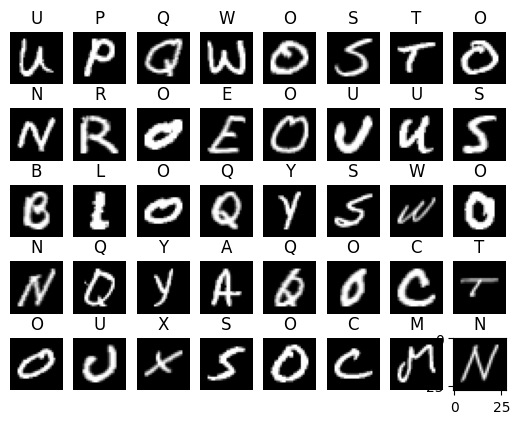

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


In [ ]:
!pip install tensorflow

In [ ]:
!pip install Keras

In [ ]:
x_train.shape

(297960, 784)

In [ ]:
y_train

array([20., 15., 16., ..., 12.,  3., 18.])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

#Разделяем на тестовую и обучающию выборку
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

#разделяем обучающую выборку на обучающую и валидационную
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)

# Изменение формы данных
x_train = x_train.reshape(-1, 28, 28)  # -1 - вычислит значение, основываясь на общем количестве элементов в массиве
x_val = x_val.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Создание модели
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Преобразование 2D изображения в 1D
model.add(Dense(1024, activation='relu'))   # Полносвязный слой с 1024 нейронами
model.add(Dropout(0.3))                    # Применение Dropout с вероятностью 30%
model.add(Dense(512, activation='relu'))   # Второй полносвязный слой с 512 нейронами
model.add(Dropout(0.2))                    # Применение Dropout с вероятностью 20%
model.add(Dense(256, activation='relu'))   # Второй полносвязный слой с 256 нейронами
model.add(Dropout(0.1))                    # Применение Dropout с вероятностью 10%
model.add(Dense(26, activation='softmax'))  # Выходной слой для 26 классов (A-Z)

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),  # Используем валидационные данные для валидации
                    epochs=11,
                    batch_size=1024)

# loss - потери сети на обучающих данных;
# accuracy - точность сети на обучающих данных;
# val_loss - потери сети на тестовых данных;
# val_accuracy - точность сети на тестовых данных.

Epoch 1/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 49s 201ms/step - accuracy: 0.5269 - loss: 18.2872 - val_accuracy: 0.8800 - val_loss: 0.4475
Epoch 2/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 47s 201ms/step - accuracy: 0.8197 - loss: 0.6804 - val_accuracy: 0.9253 - val_loss: 0.2786
Epoch 3/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 202ms/step - accuracy: 0.8800 - loss: 0.4379 - val_accuracy: 0.9436 - val_loss: 0.2092
Epoch 4/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 82s 201ms/step - accuracy: 0.9068 - loss: 0.3373 - val_accuracy: 0.9523 - val_loss: 0.1758
Epoch 5/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 81s 199ms/step - accuracy: 0.9226 - loss: 0.2765 - val_accuracy: 0.9600 - val_loss: 0.1470
Epoch 6/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 46s 199ms/step - accuracy: 0.9328 - loss: 0.2377 - val_accuracy: 0.9626 - val_loss: 0.1382
Epoch 7/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 48s 207ms/step - accuracy: 0.9413 - loss: 0.2078 - val_accuracy: 0.9650 - val_loss: 0.1264
Epoch 8/11
233/233 ━━━━━━━━━━━━━━━━━━━━ 81s 205ms/step - accuracy: 0.9463 - loss: 

In [ ]:
#оценка модели после обучения на тестовой выборке
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Потери на тестовом образце: {test_loss}, Точность на тестовом образце: {test_accuracy}')

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9738 - loss: 0.0930
Потери на тестовом образце: 0.09115207940340042, Точность на тестовом образце: 0.9746949076652527


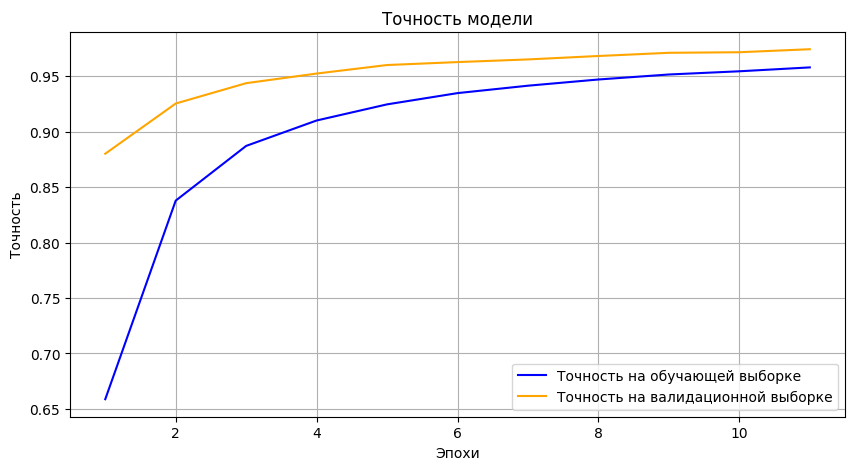

In [ ]:
import matplotlib.pyplot as plt

# Извлекаем значения accuracy и val_accuracy из history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Создание графика
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Точность на обучающей выборке', color='blue')
plt.plot(epochs, val_accuracy, label='Точность на валидационной выборке', color='orange')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.grid()
plt.show()

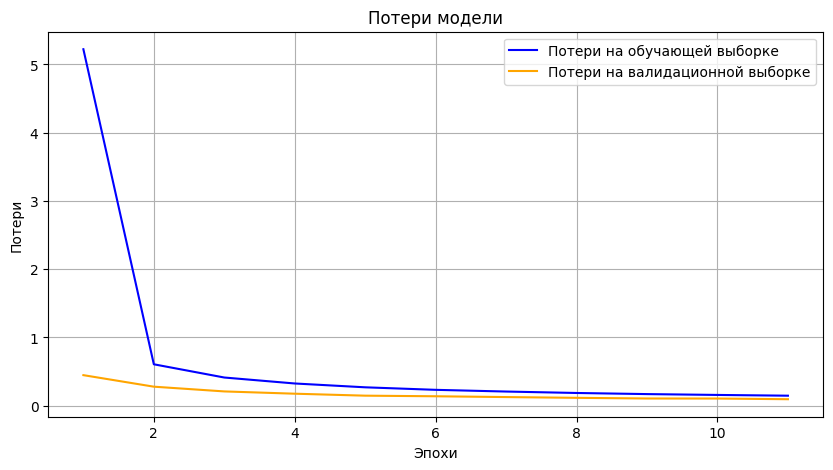

In [ ]:

# Извлекаем значения потерь из history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Создание графика
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Потери на обучающей выборке', color='blue')
plt.plot(epochs, val_loss, label='Потери на валидационной выборке', color='orange')
plt.title('Потери модели')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid()
plt.show()

На основании представленных данных можно сказать что в начале обучения точность на обучающей выборке была 52,69% (Epoch 1) и постепенно увеличивалась до 95,73% (Epoch 11). Это говорит о том, что модель хорошо обучается на обучающей выборке.Точность на валидационной выборке также увеличивалась, начиная с 88% (Epoch 1) и достигая 97.42% (Epoch 11). Это также указывает на то, что модель хорошо обобщает на валидационных данных.Значение потерь на обучающей выборке (loss) уменьшается с 18.2872 до 0.1481, что является хорошим знаком. Потеря на валидационной выборке также уменьшается, начиная с 0.4475 и заканчивая на 0.0949.

Точность на контрольном наборе составила 97,46%.

Потери на контрольном наборе составили 0.09115